In [1]:
%run lab5_custom_K-MEANS.ipynb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [3]:
class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.mean = None
        self.components = None
        
    def fit(self, X):
        self.mean = X.mean(axis=0)
        X_centered = X - self.mean       
        cov = np.cov(X_centered.T)
        eig_vals, eig_vecs = np.linalg.eigh(cov)
        sorted_idx = np.argsort(eig_vals)[::-1]
        self.components = eig_vecs[:, sorted_idx][:, :self.n_components]
        
    def transform(self, X):
        return (X - self.mean) @ self.components
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

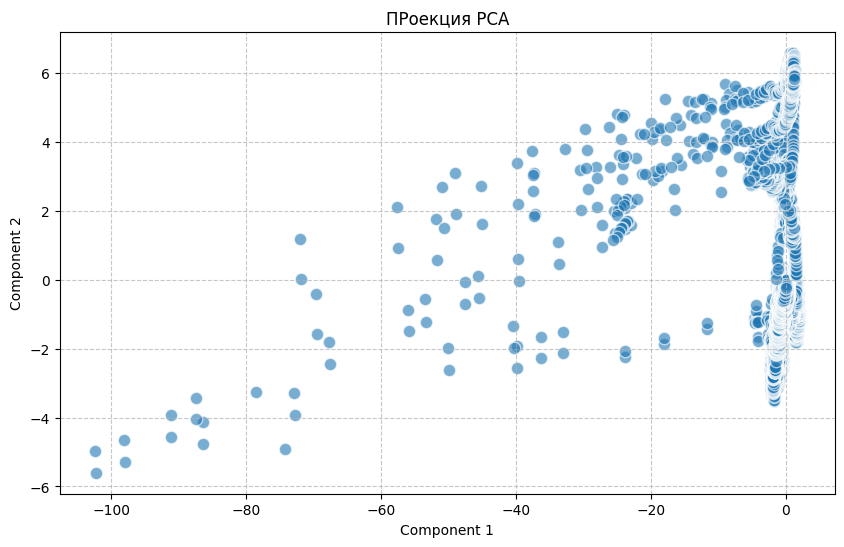

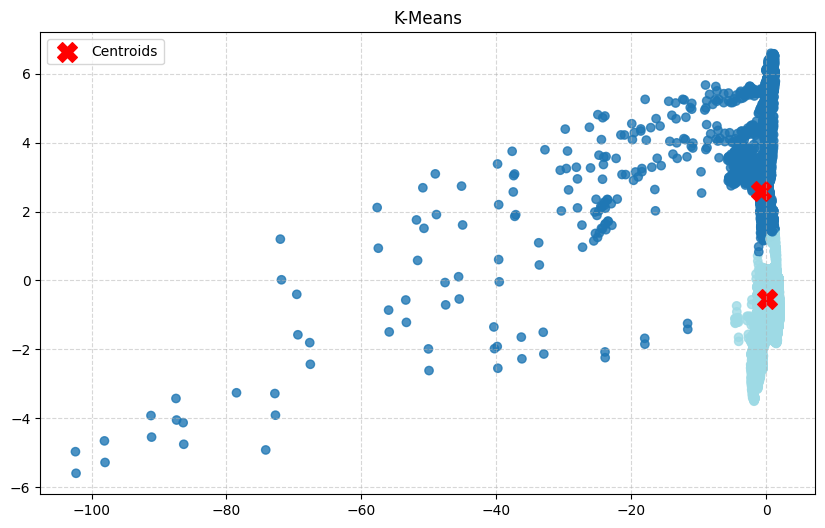

In [13]:
# Загрузка и подготовка данных
df = pd.read_csv(r'C:\Users\Zver\Desktop\ML\data\smoke_detector_task_filtered.csv')
y_class = df['Fire Alarm'].values
df = df.drop(columns=['Unnamed: 0', 'Fire Alarm'])
X = df.values

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, edgecolors='w', s=80)
plt.title('ПРоекция PCA')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Кластеризация
kmeans = SimpleKMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Визуализация кластеров
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='tab20', alpha=0.8)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [14]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score

print("\nВнутренние метрики качества:")
print(f"Силуэтный индекс: {silhouette_score(X_pca, kmeans.labels_):.3f}")
print(f"Индекс Калинского-Харабаша: {calinski_harabasz_score(X_pca, kmeans.labels_):.2f}")

print("\nВнешние метрики качества:")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_class, kmeans.labels_):.3f}")



Внутренние метрики качества:
Силуэтный индекс: 0.622
Индекс Калинского-Харабаша: 15908.60

Внешние метрики качества:
Adjusted Rand Index: 0.586
